![credit card banner](images/banner-credit-card-fraud.jpg "Credit card fraud detection banner")

## Credict Card Fraud Detection using `LOGISTIC REGRESSION`

In [1]:
# You can download the dataset using the API's Kaggle
# import kaggle     --> # kaggle doesn't works with  Python 3.12
# kaggle datasets download -d mlg-ulb/creditcardfraud

# Or can be downloaded it from: 
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

100%|██████████████████████████████████████| 66.0M/66.0M [00:07<00:00, 10.6MB/s]
100%|██████████████████████████████████████| 66.0M/66.0M [00:07<00:00, 9.87MB/s]


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from basic_functions import extract_files
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from fasteda import fast_eda
import seaborn as sns
import itertools
import pandas as pd
import numpy as np



In [2]:
extract_files('creditcardfraud.zip')

In [3]:
df_credit_card = pd.read_csv('creditcard.csv') 

DataFrame Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


DataFrame Tail:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(284807, 31)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-nul

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/fasteda/__init__.py:92: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_negative_red, subset = info_cols)


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Time,284807,94813.86,84692,47488.146,0,54201.5,84692,139320.5,172792,-0.035567,-1.293528
V1,284807,0,0.018,1.959,-56.408,-0.92,0.018,1.316,2.455,-3.280650,32.486088
V2,284807,0,0.065,1.651,-72.716,-0.599,0.065,0.804,22.058,-4.624841,95.771404
V3,284807,-0,0.18,1.516,-48.326,-0.89,0.18,1.027,9.383,-2.240144,26.619062
V4,284807,0,-0.02,1.416,-5.683,-0.849,-0.02,0.743,16.875,0.676289,2.635388
V5,284807,0,-0.054,1.38,-113.743,-0.692,-0.054,0.612,34.802,-2.425889,206.900907
V6,284807,0,-0.274,1.332,-26.161,-0.768,-0.274,0.399,73.302,1.826571,42.641724
V7,284807,-0,0.04,1.237,-43.557,-0.554,0.04,0.57,120.589,2.553894,405.600275
V8,284807,0,0.022,1.194,-73.217,-0.209,0.022,0.327,20.007,-8.521899,220.583080
V9,284807,-0,-0.051,1.099,-13.434,-0.643,-0.051,0.597,15.595,0.554677,3.731224


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



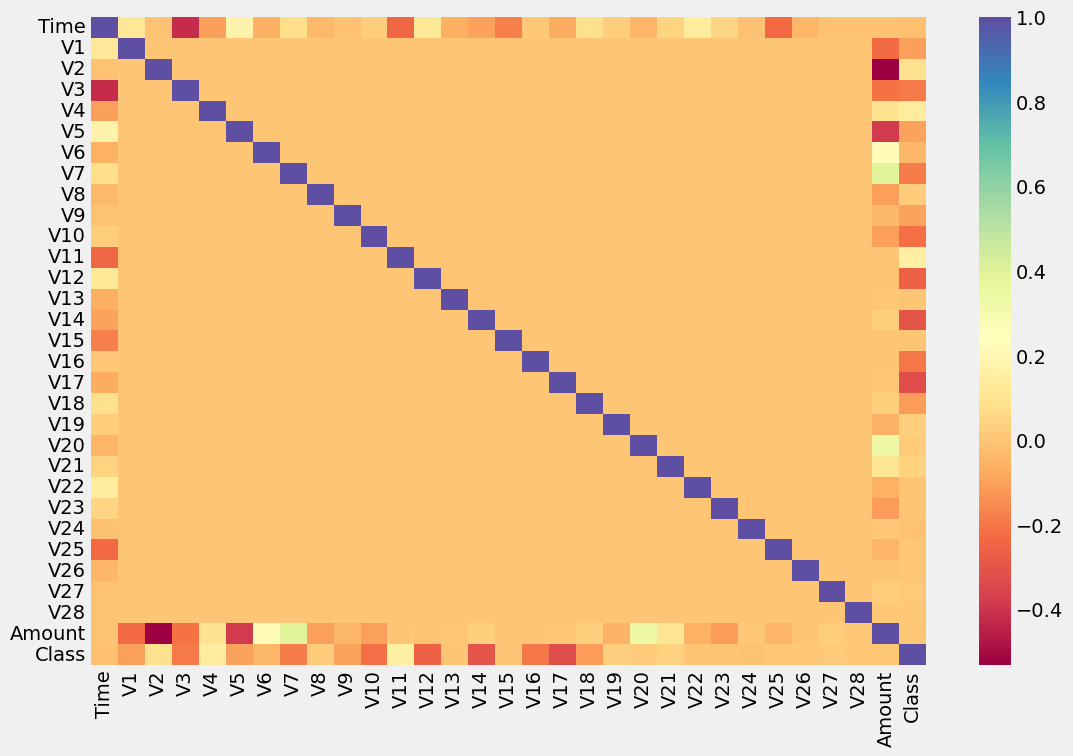

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


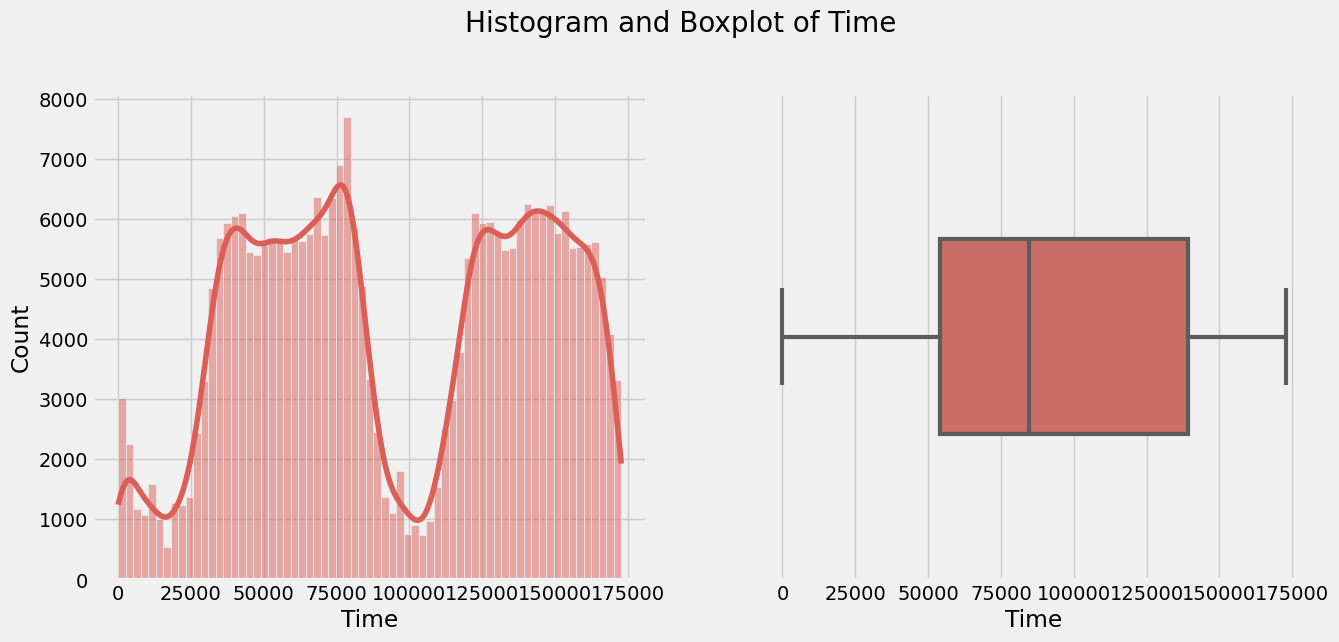

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


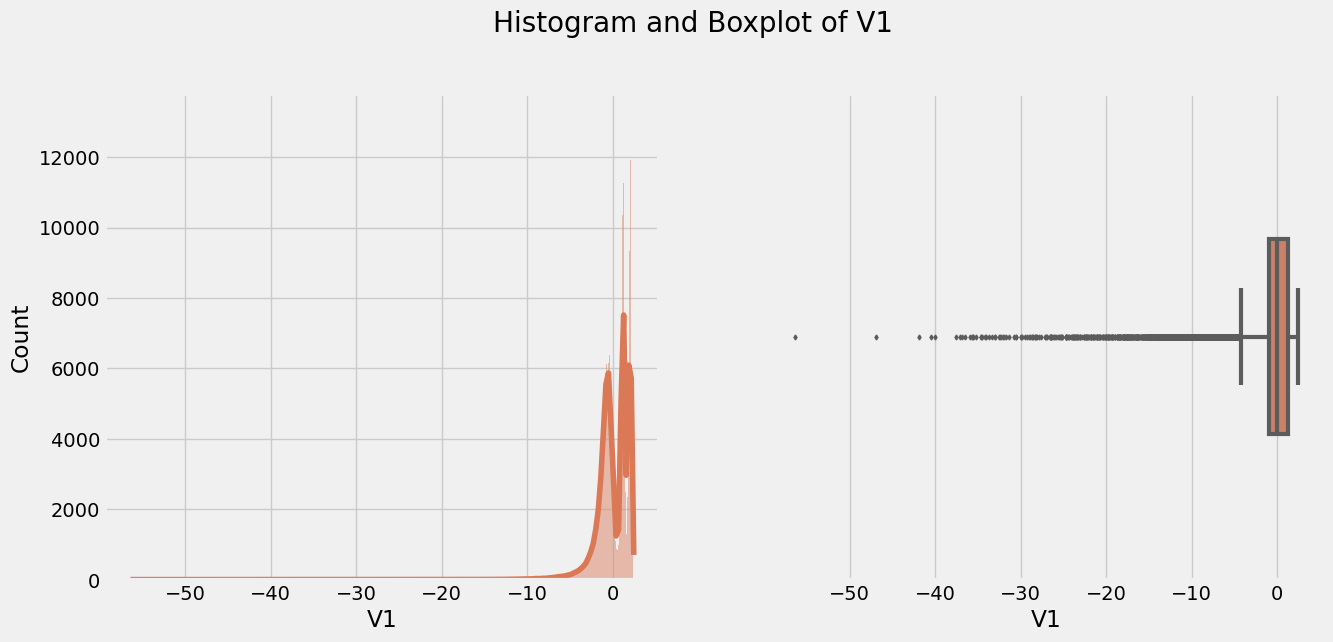

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


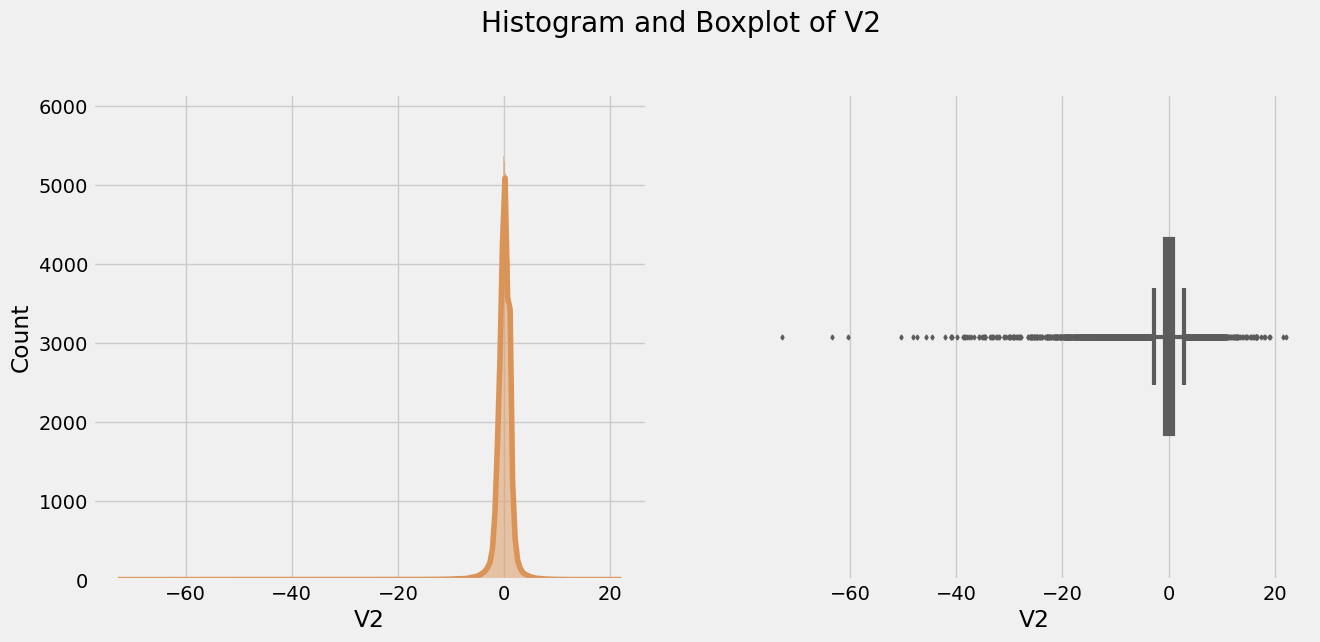

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


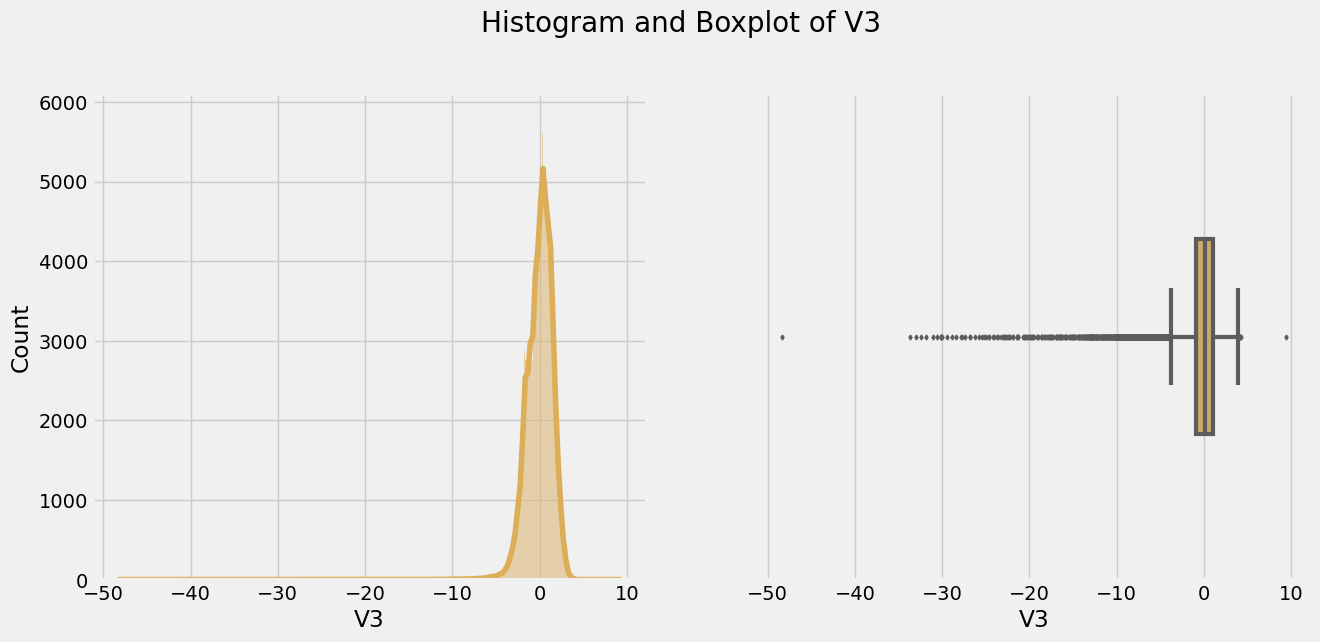

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


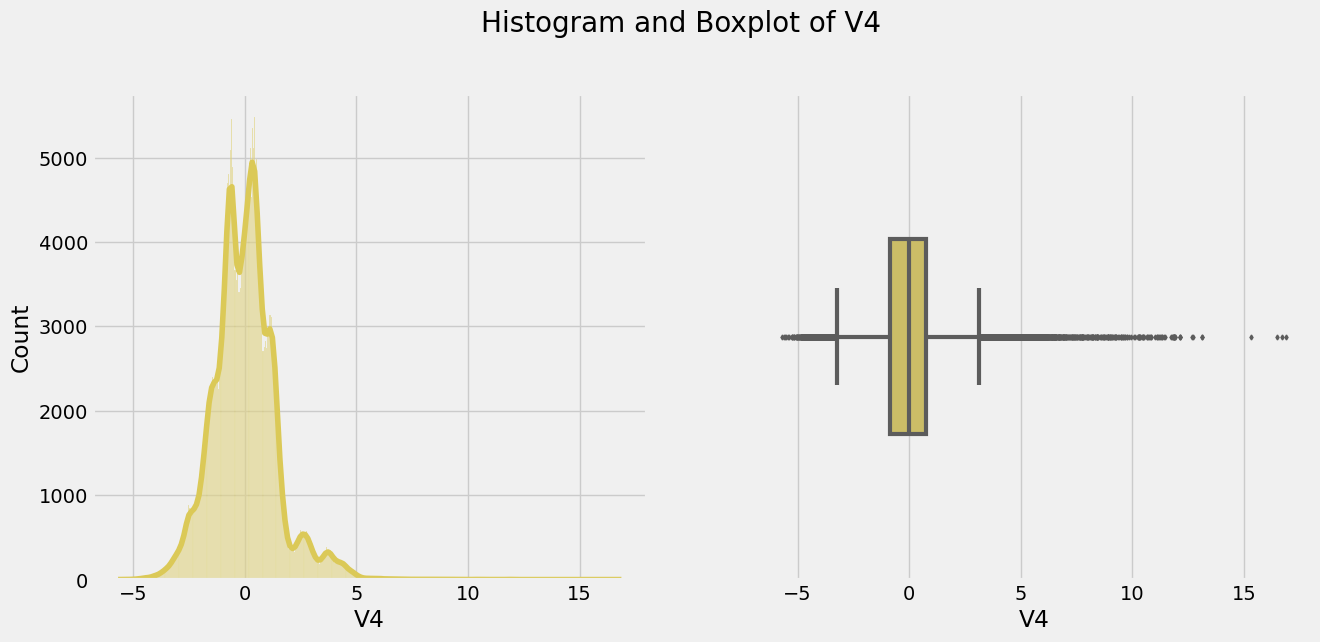

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


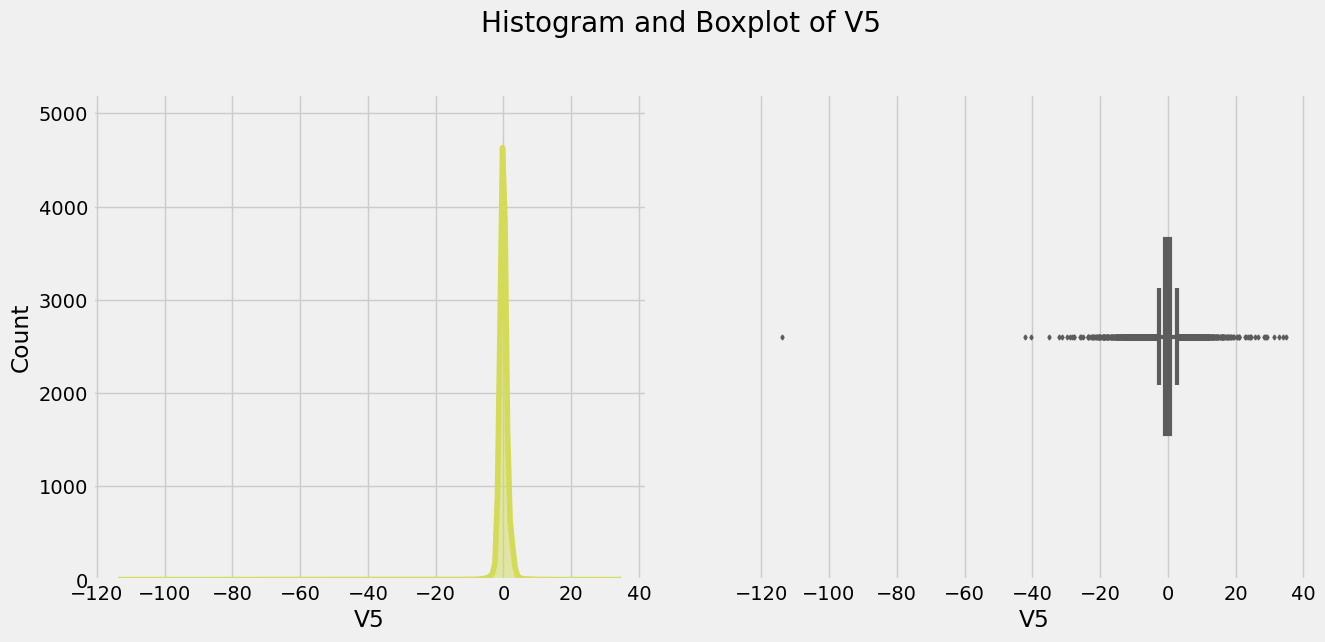

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


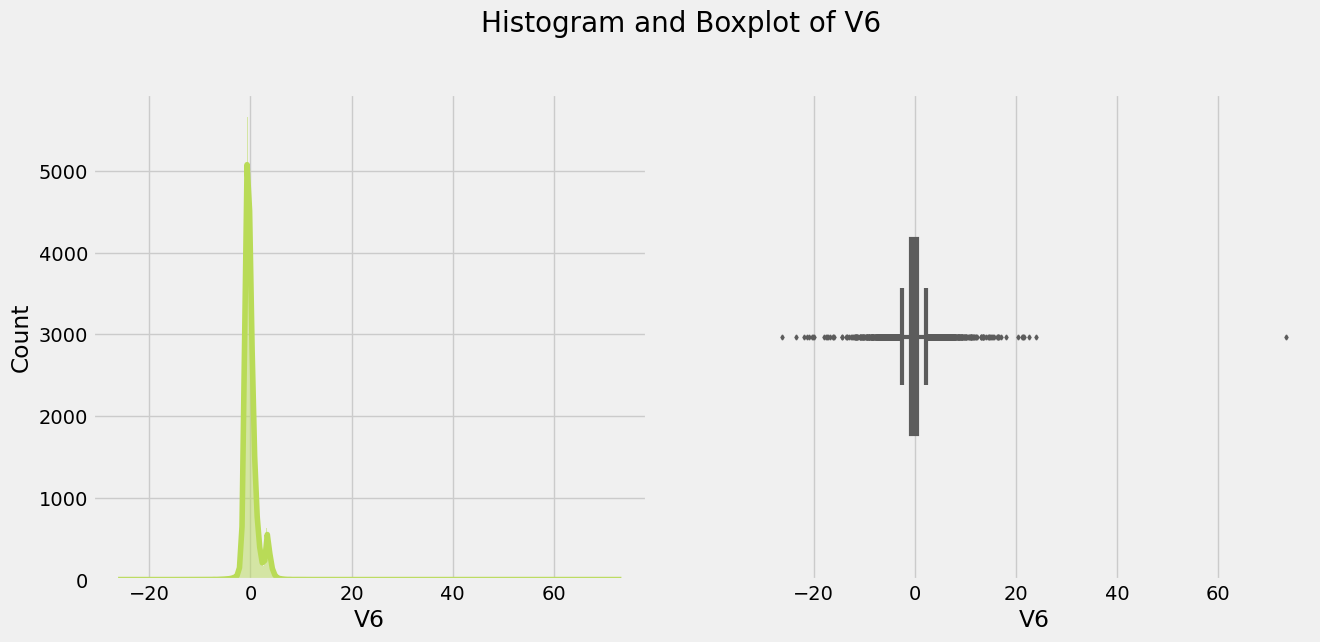

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


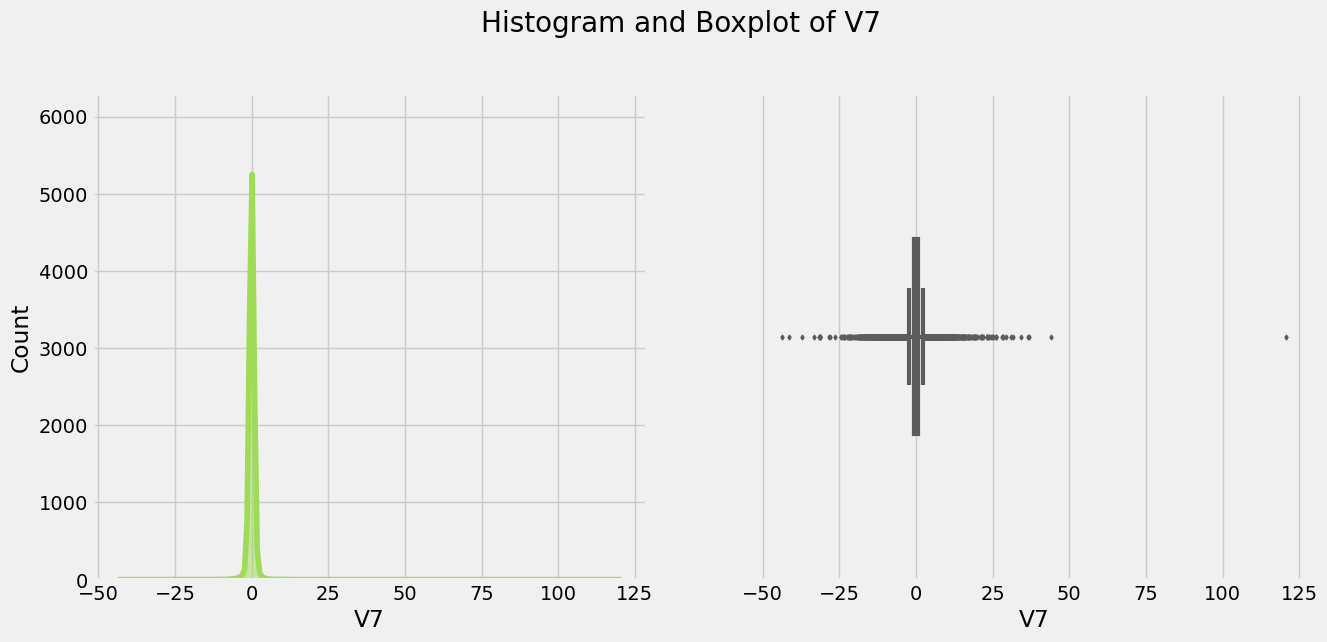

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


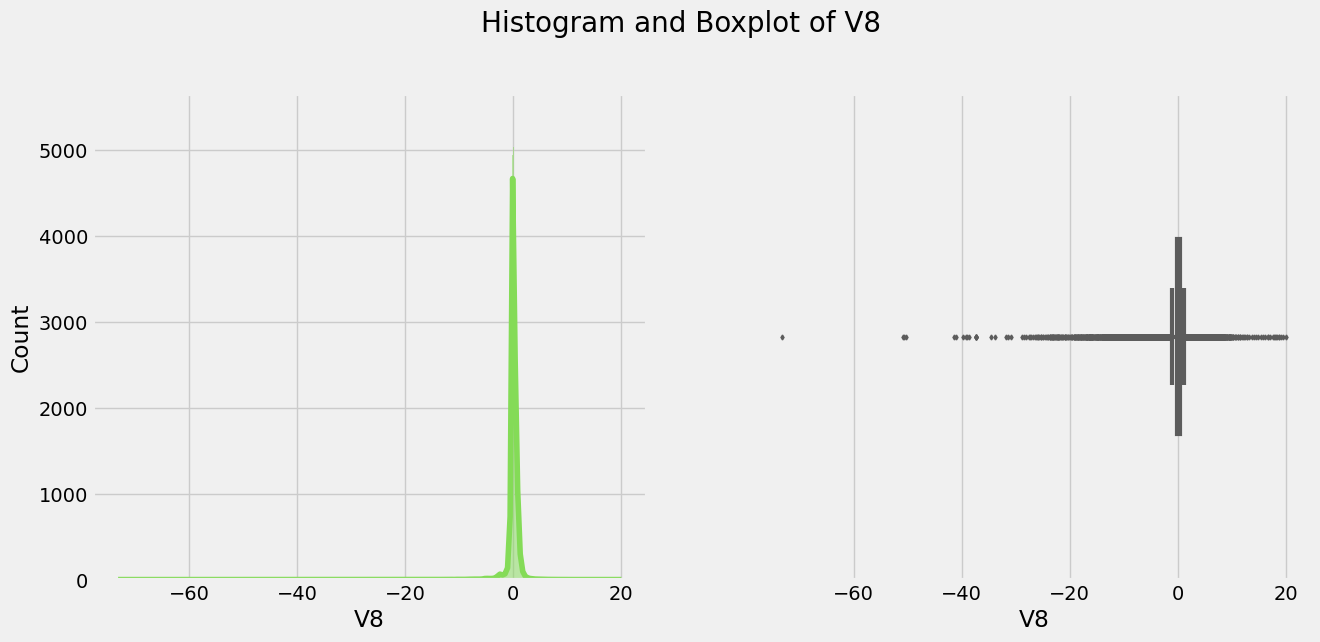

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


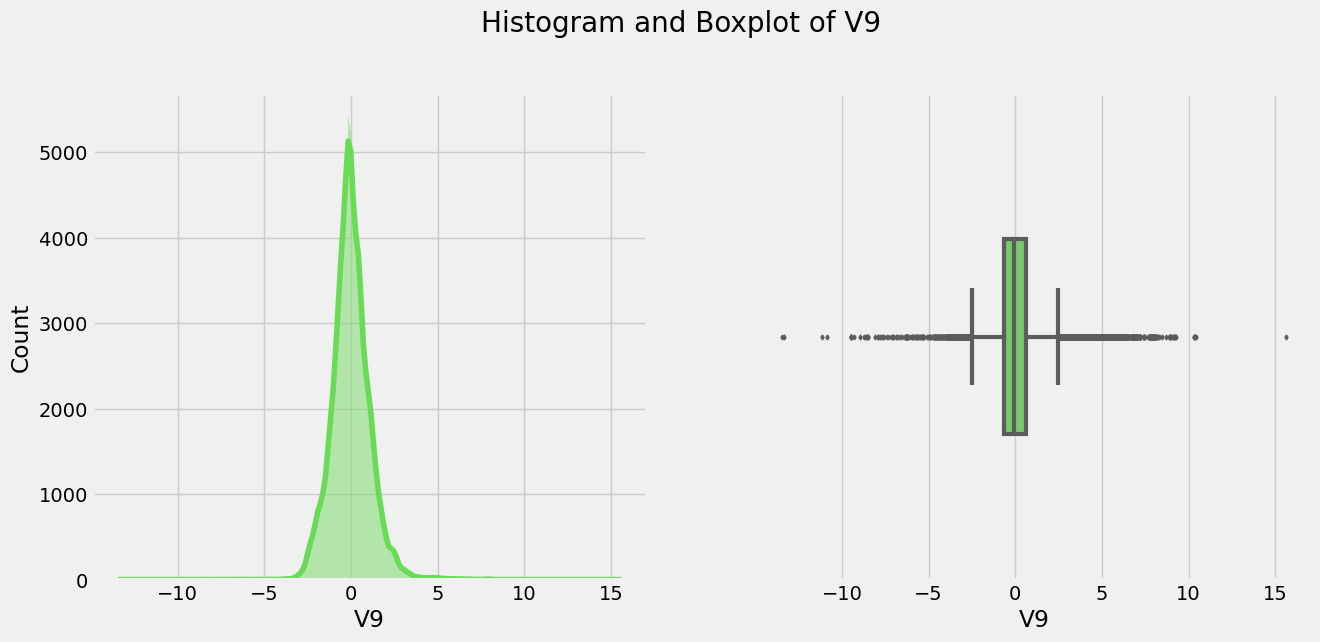

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


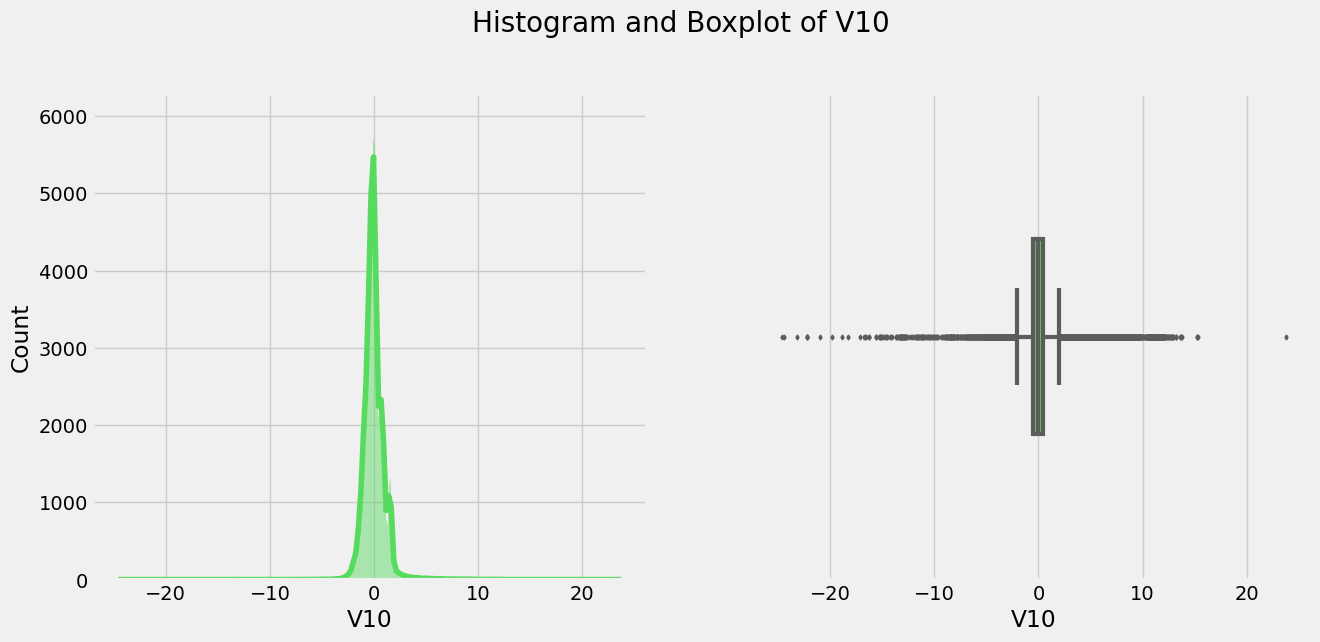

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


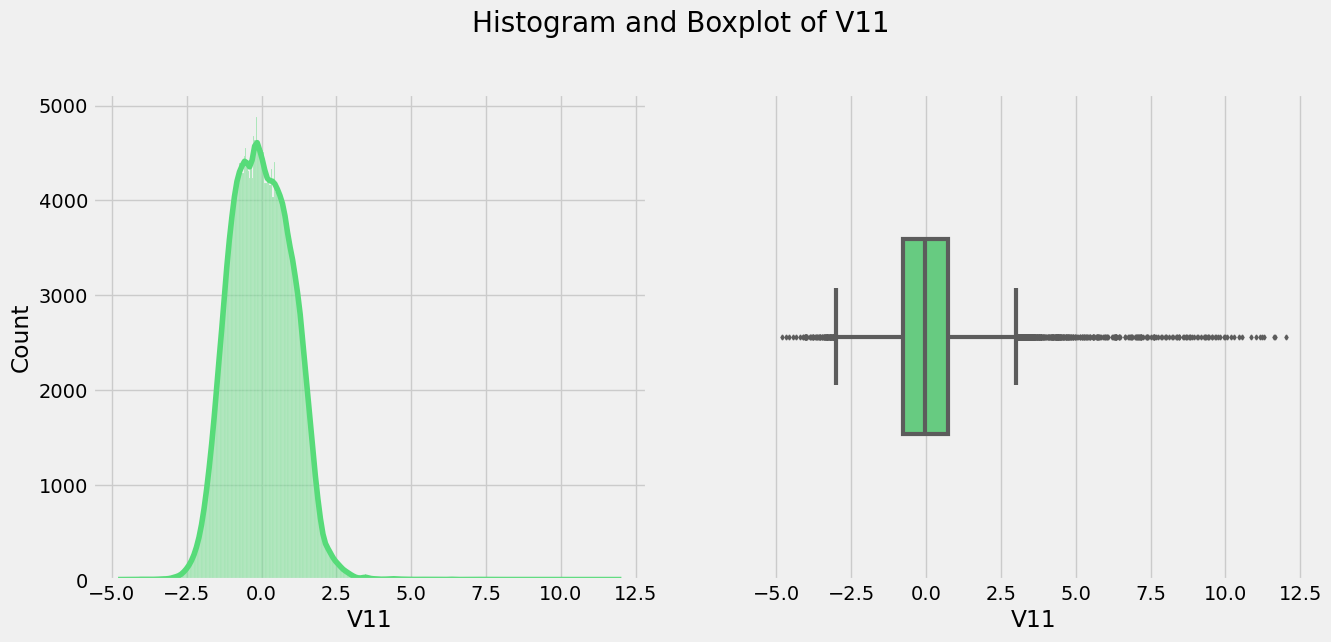

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


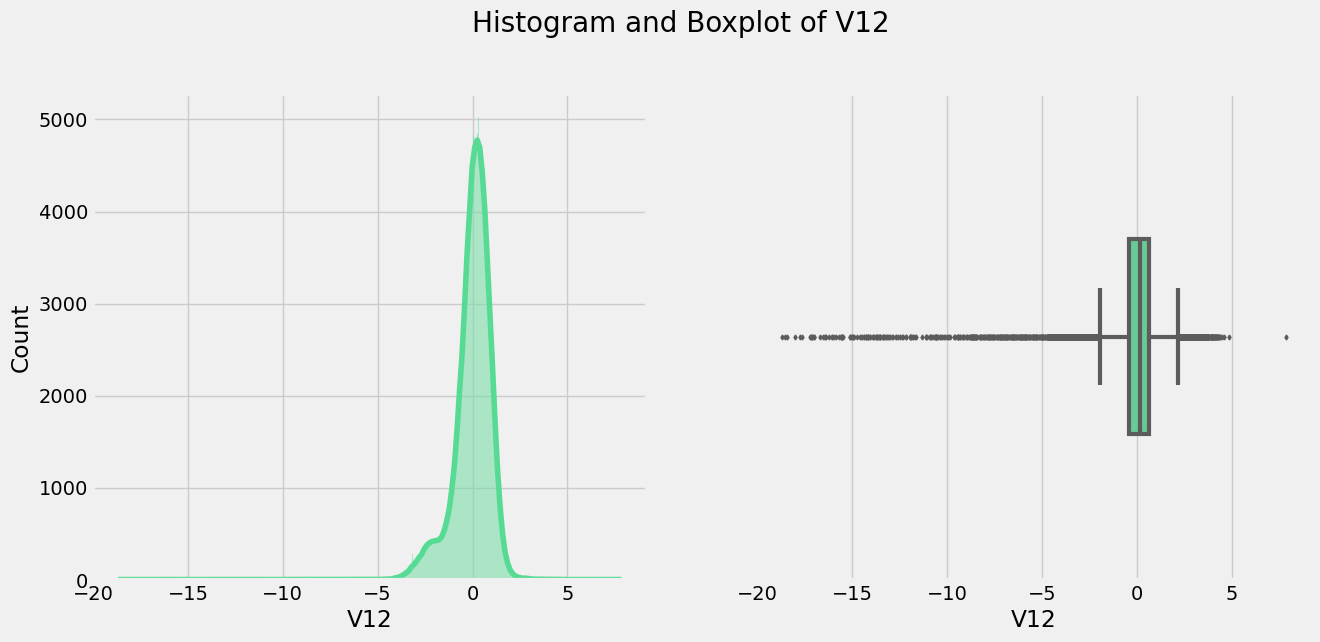

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


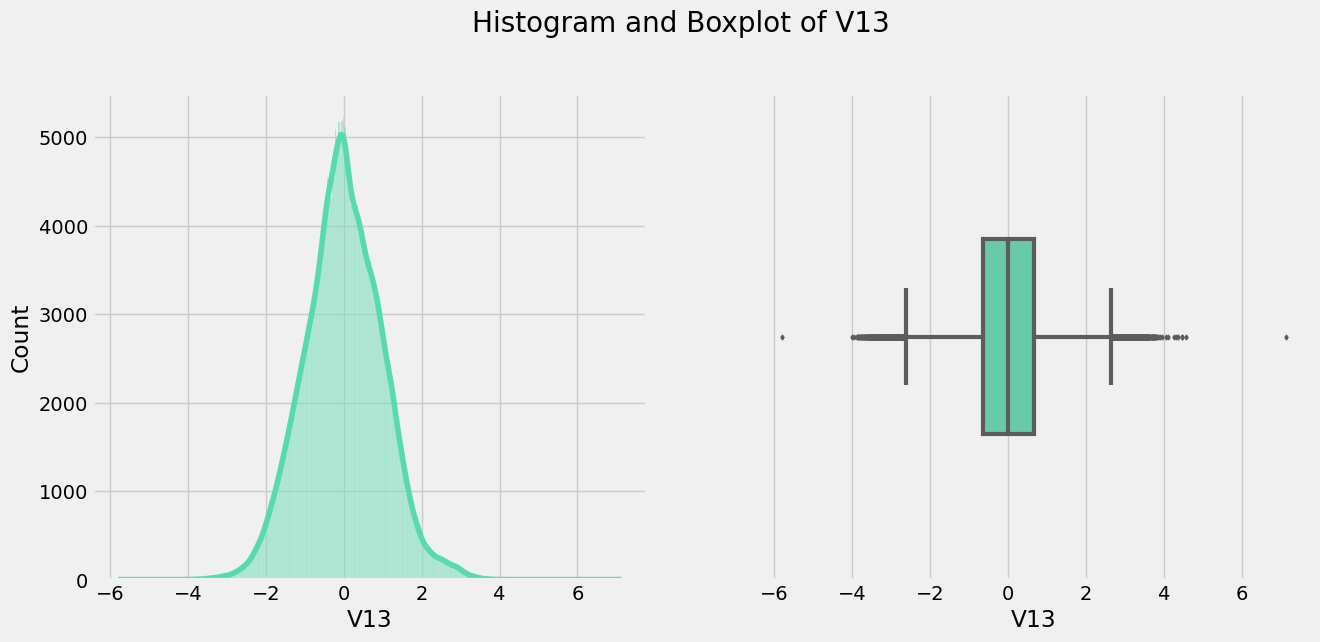

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


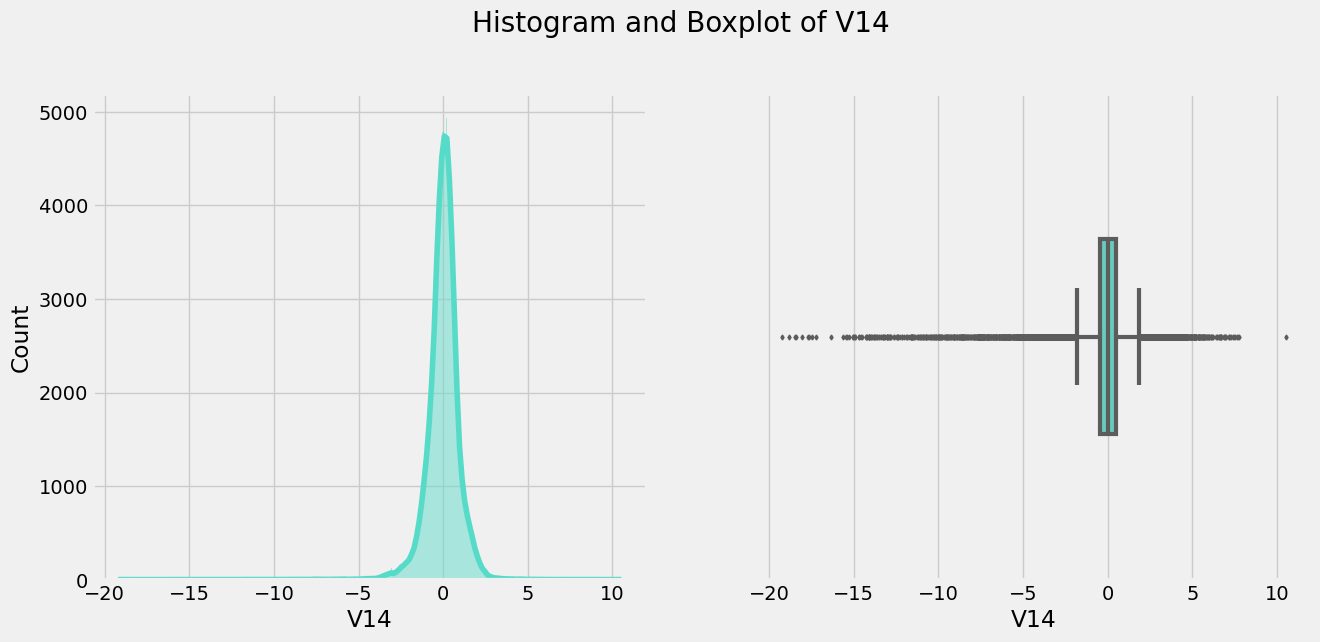

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


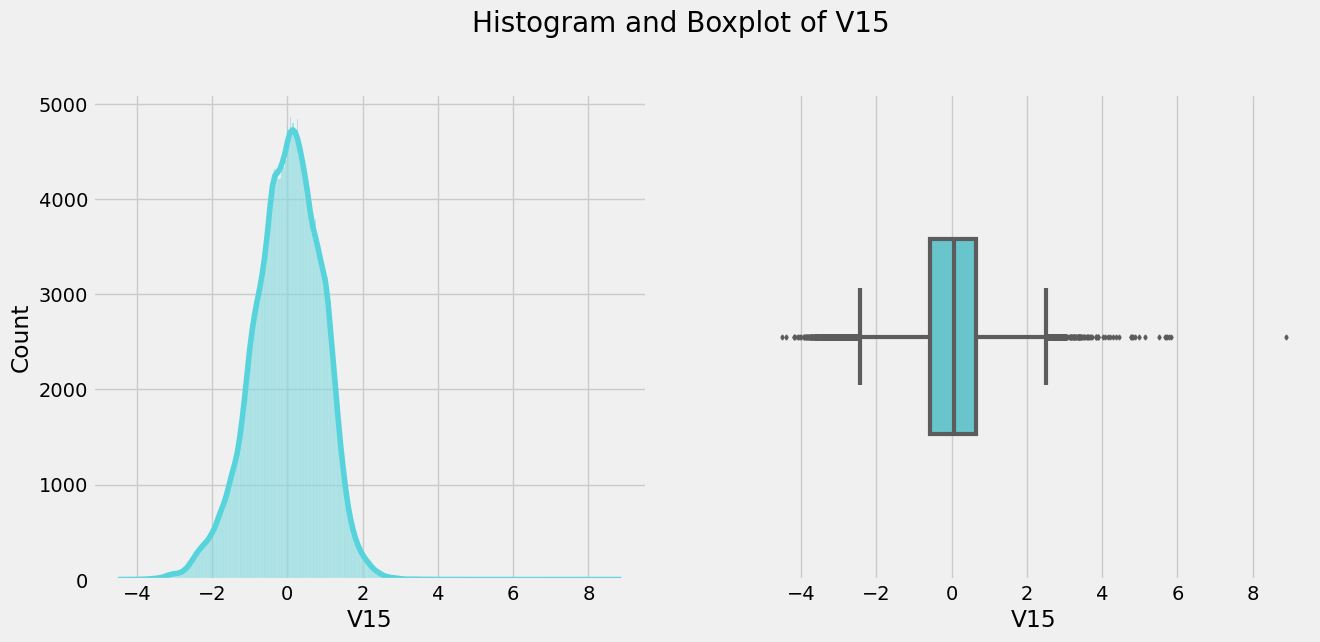

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


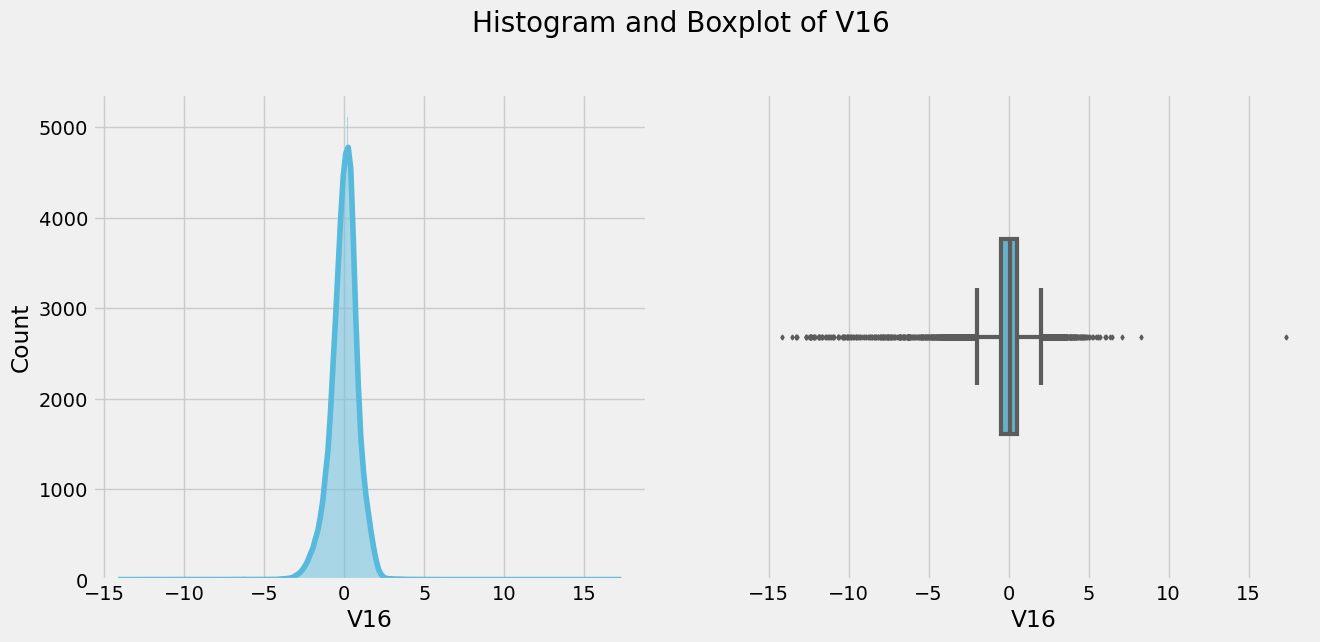

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


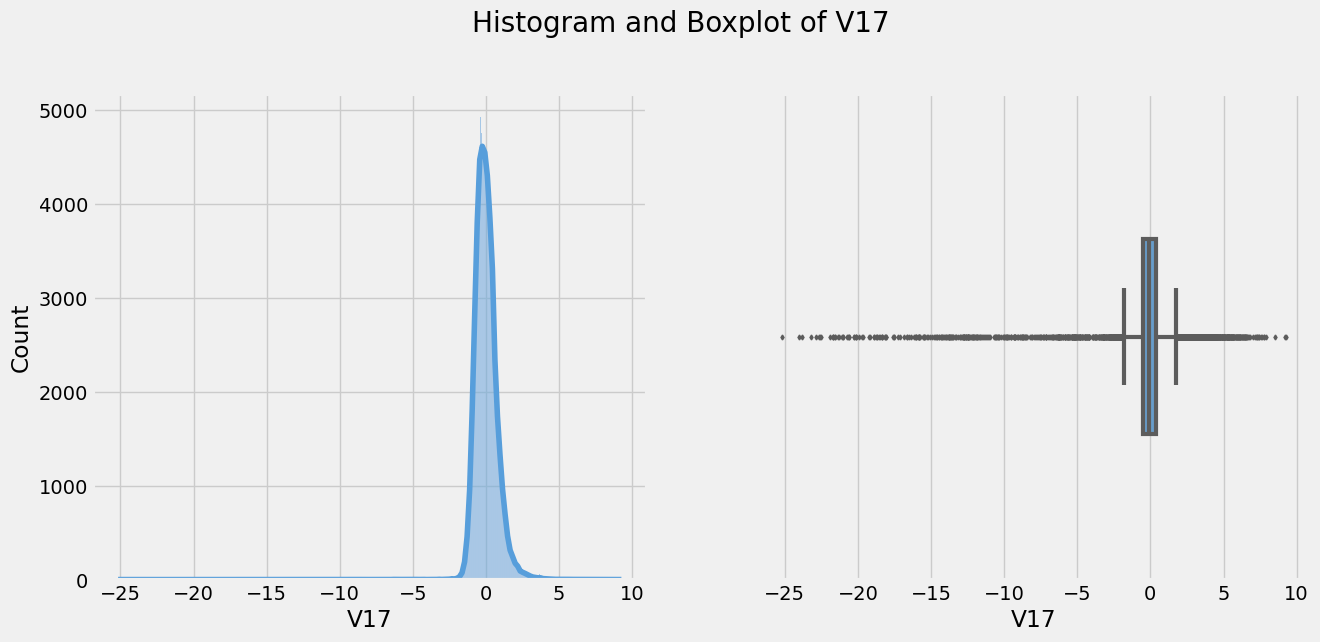

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


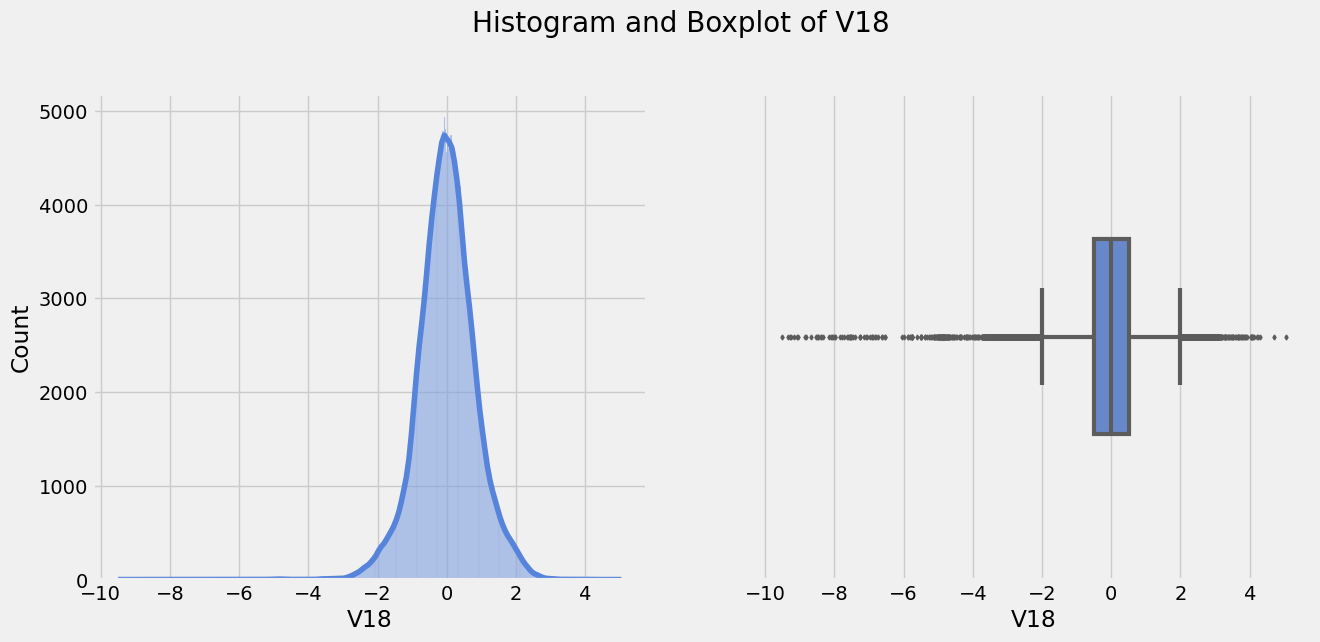

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


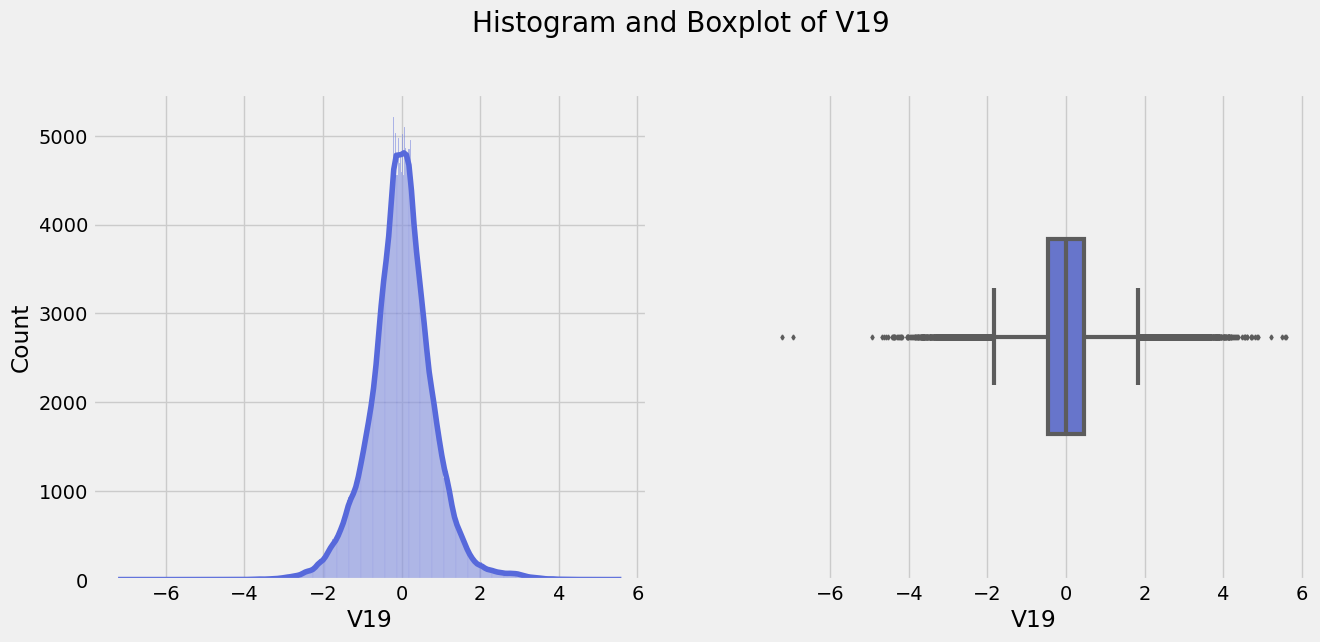

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


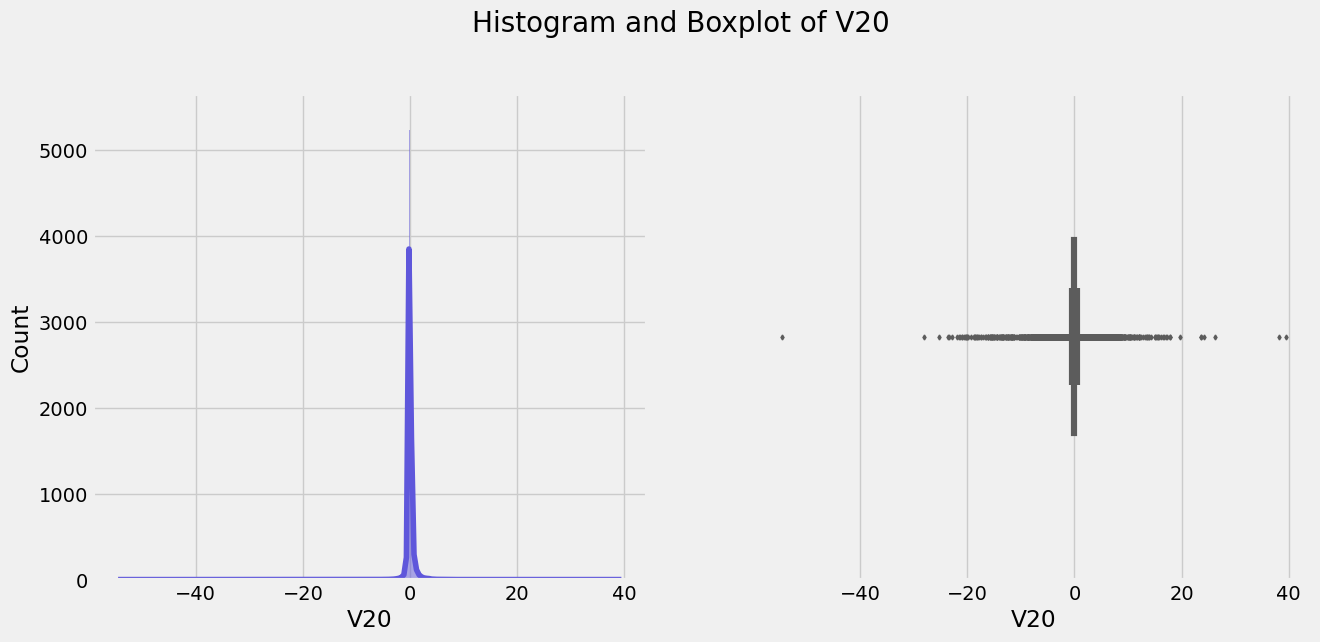

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


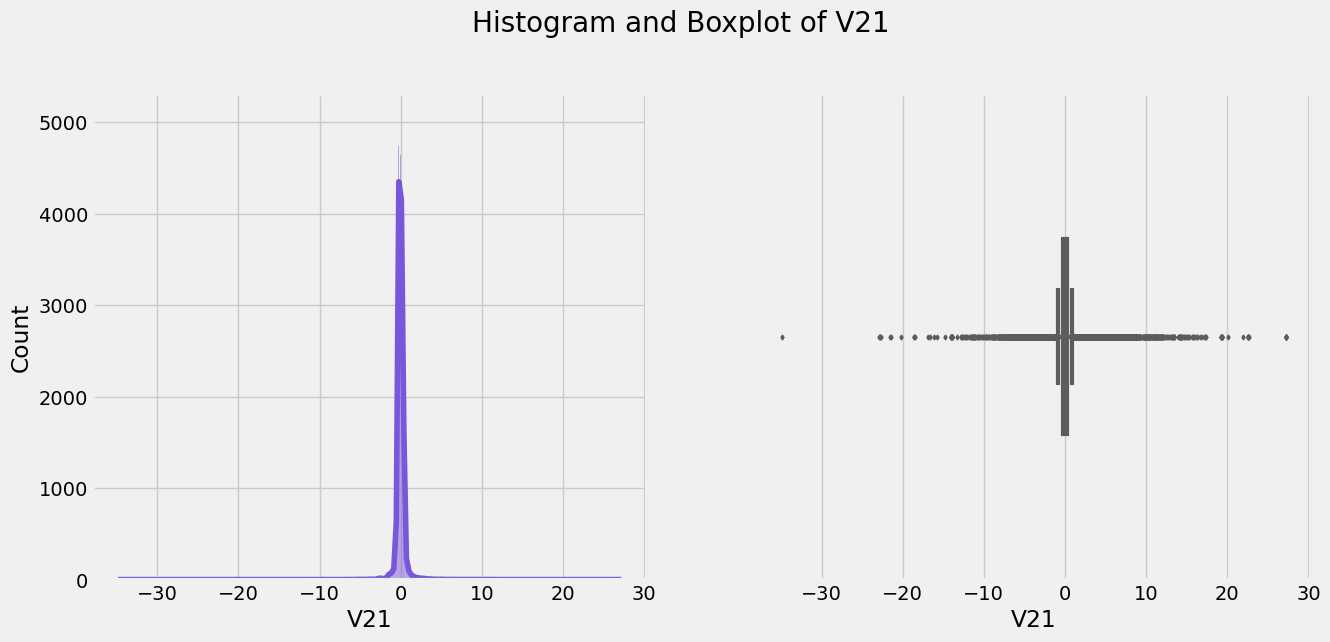

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


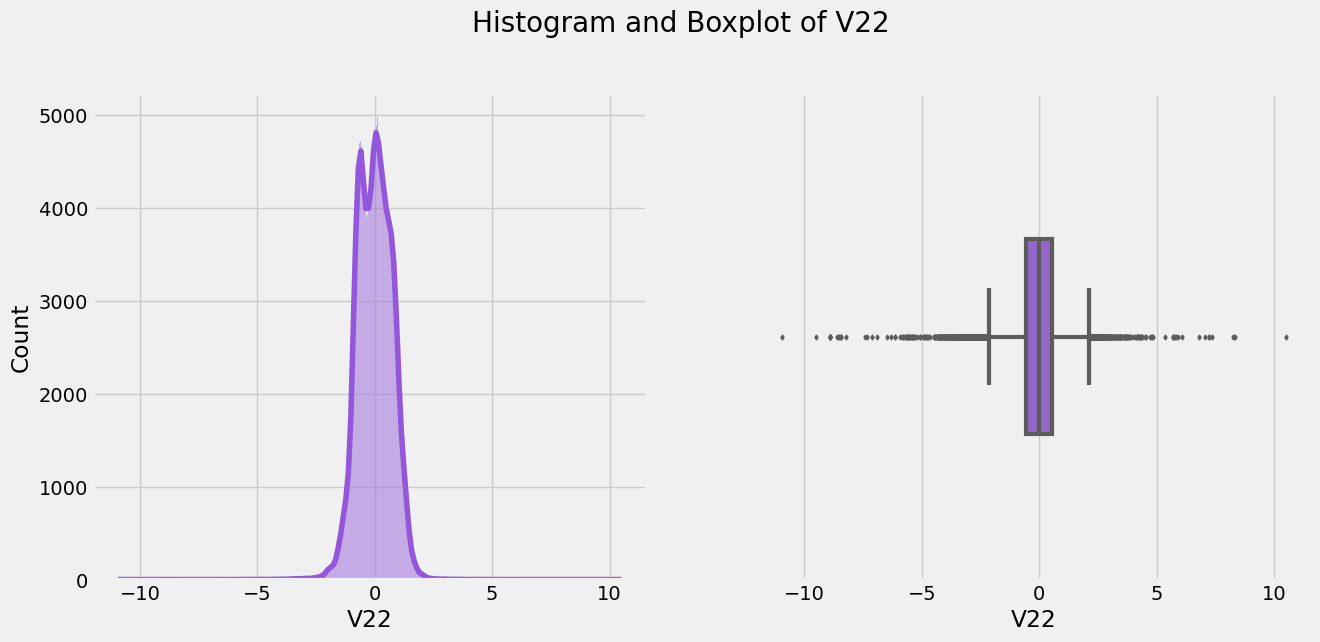

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


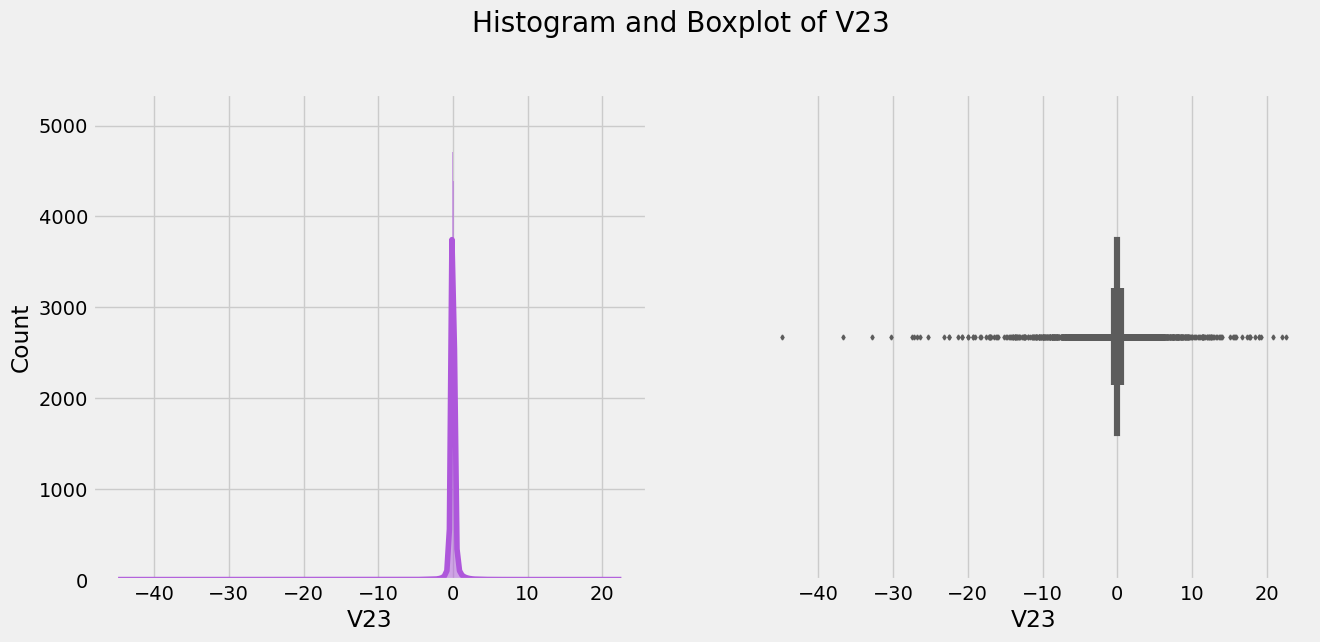

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


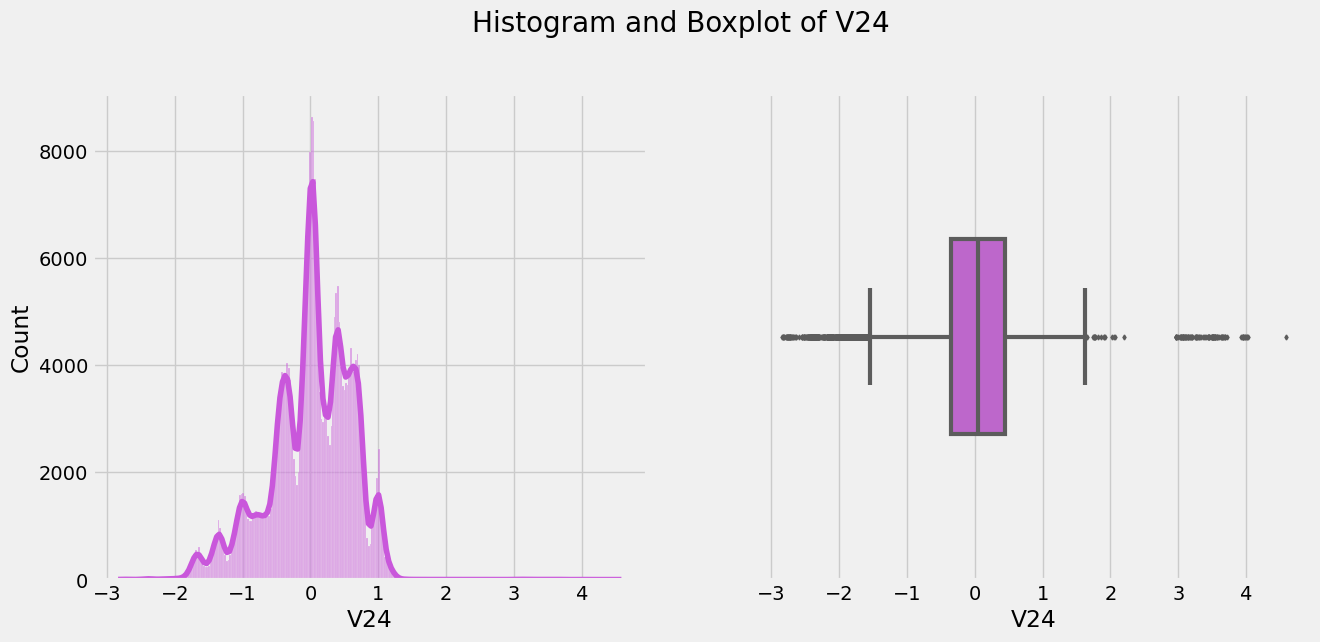

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


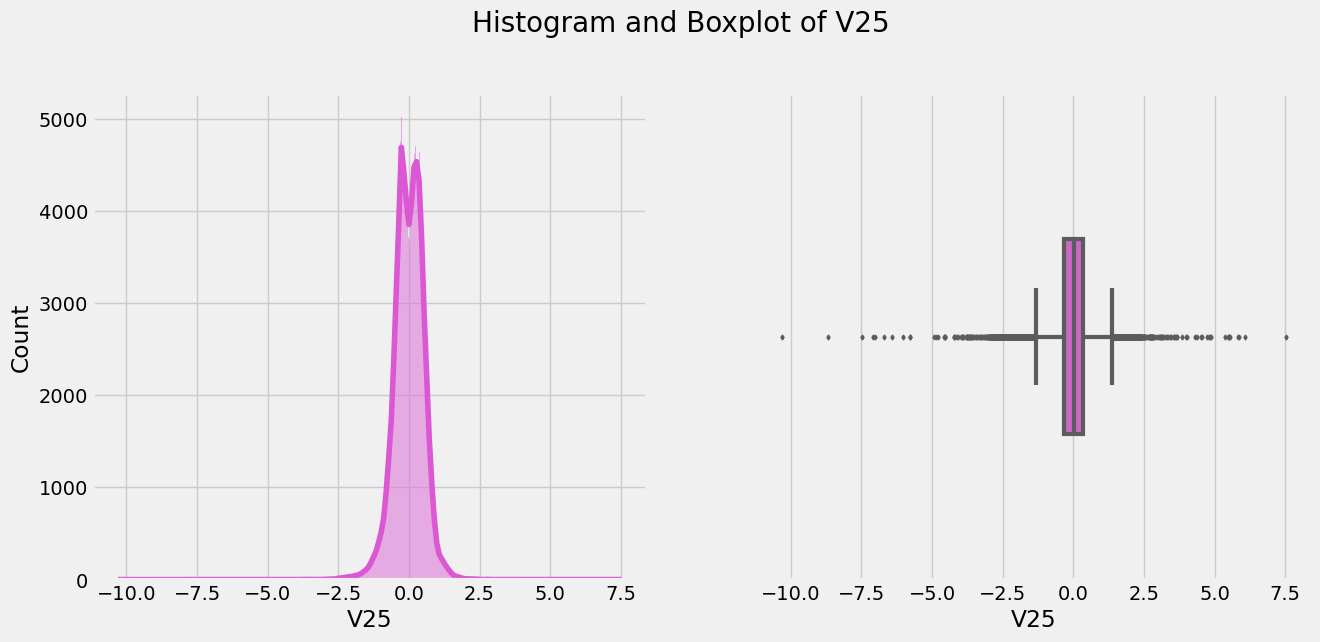

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


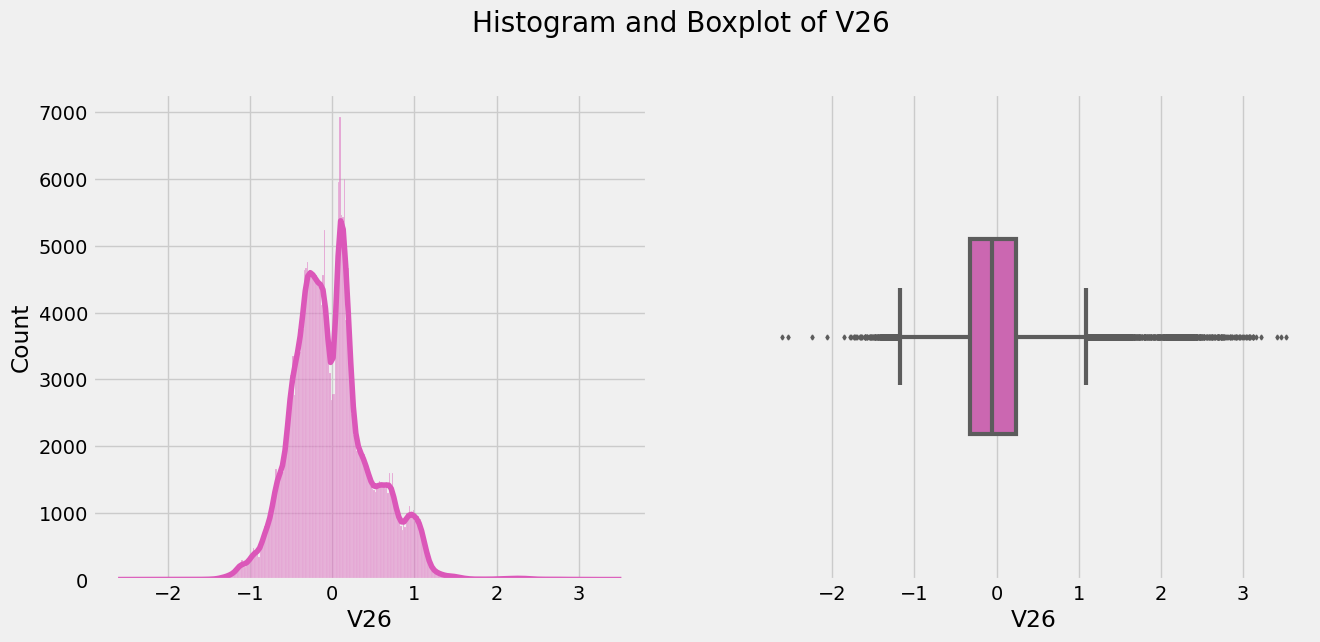

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


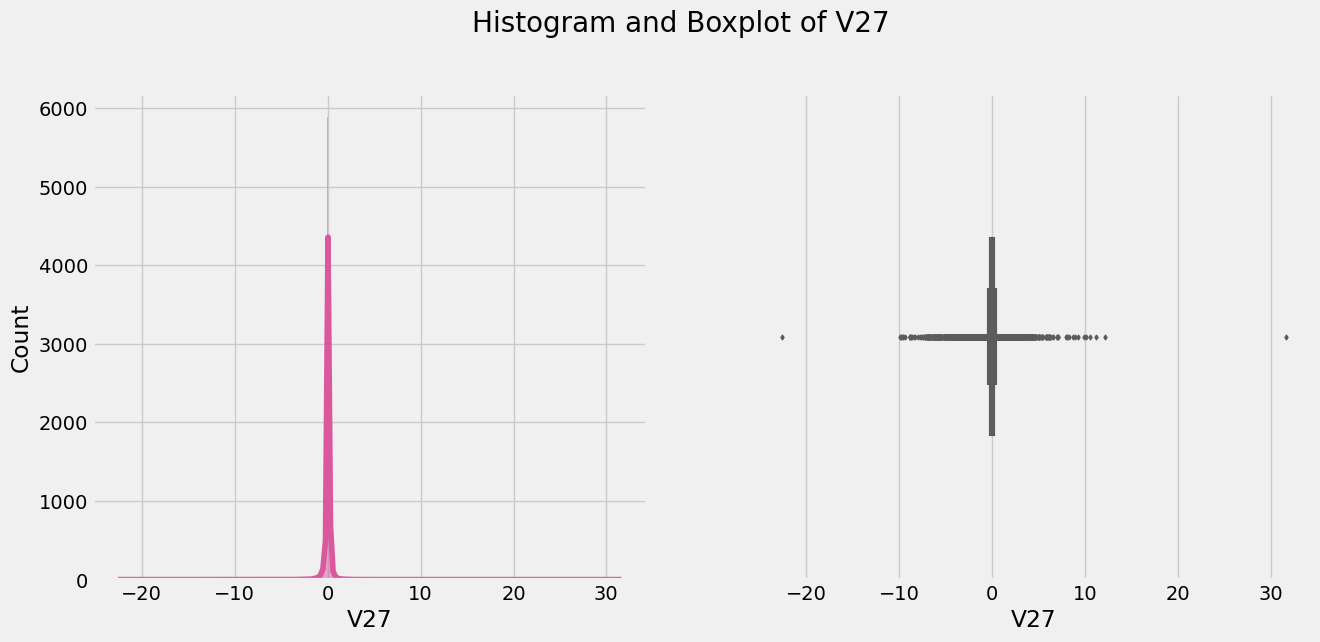

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


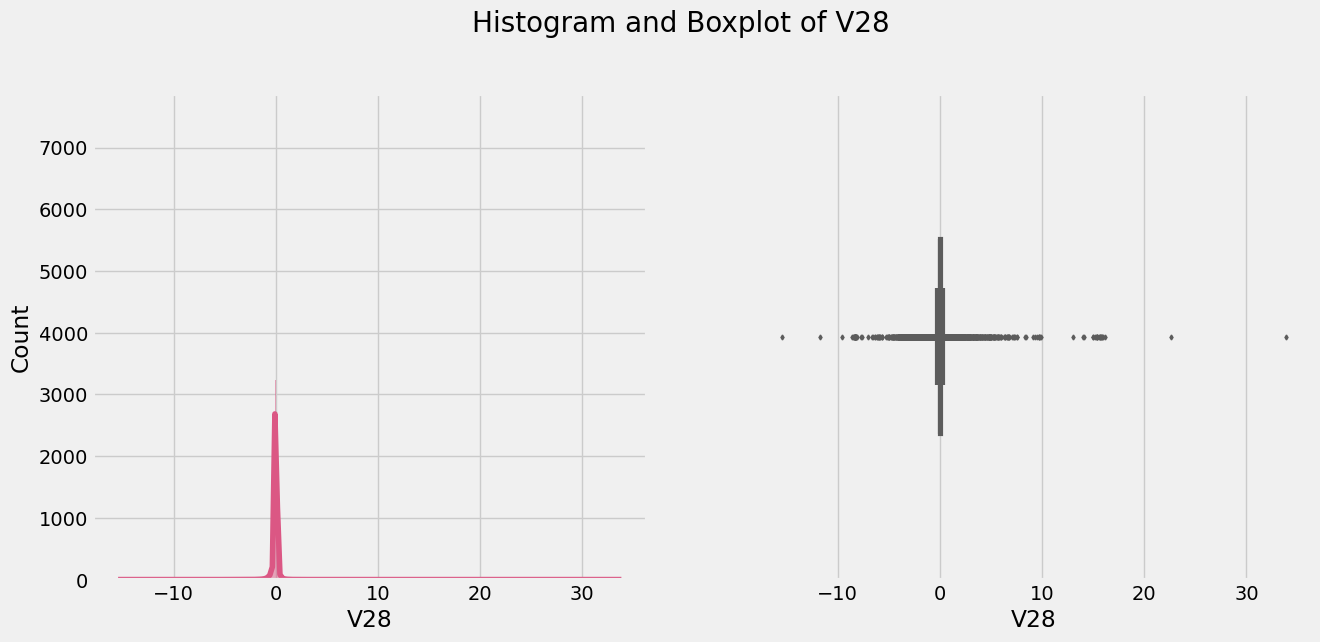

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


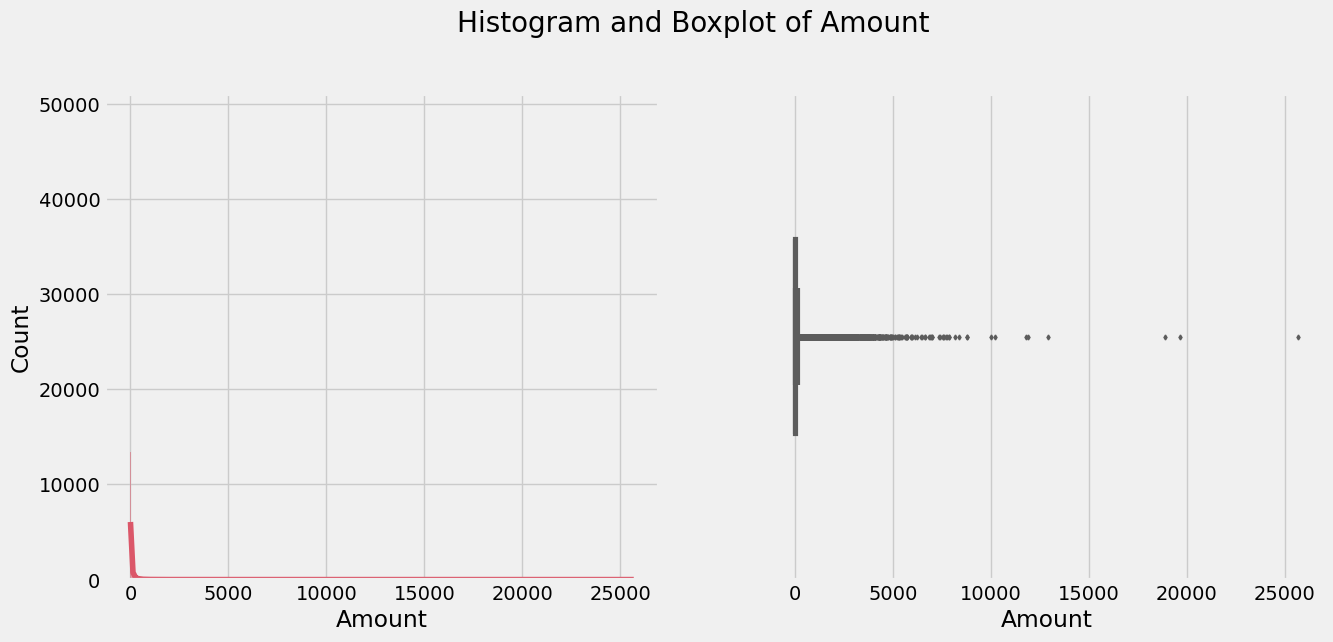

----------------------------------------------------------------------------------------------------
Countplot(s):



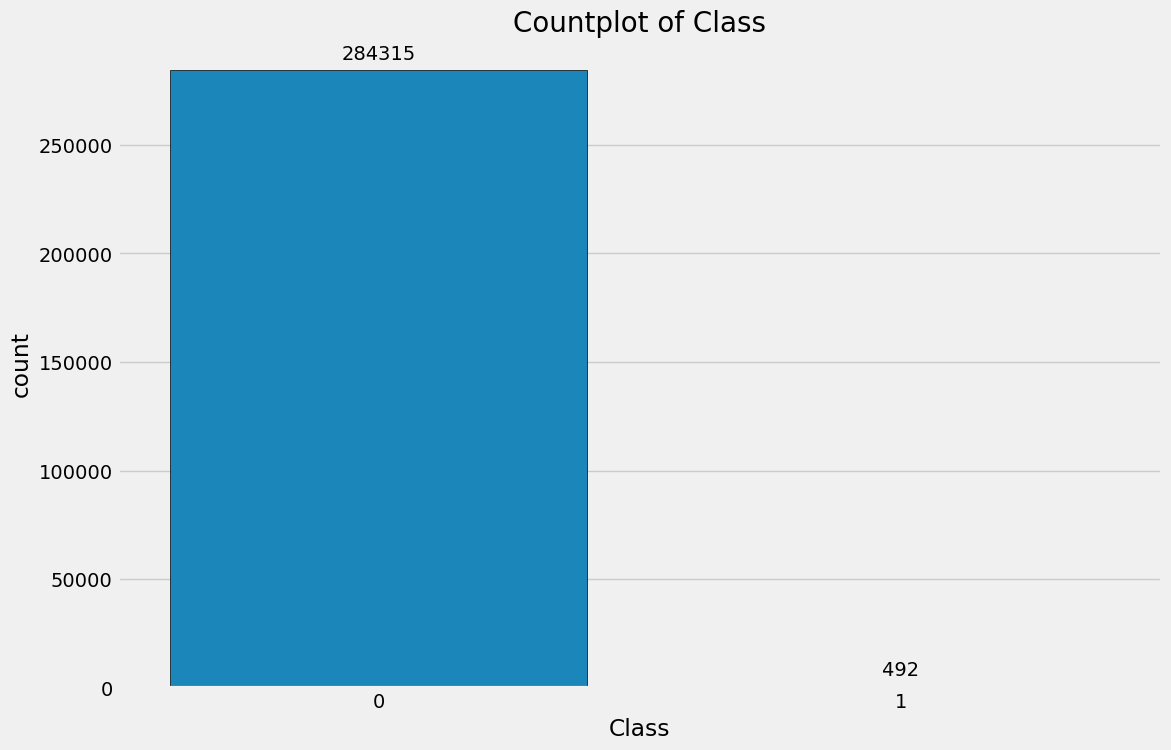

In [5]:
fast_eda(df_credit_card)

### Logistic Regression

Let's check the type of target data, it must be an integer. If it isn't an integer, we should change its type. 

In [153]:
df_credit_card.Class.dtype

dtype('int64')

In [36]:
fraud = df_credit_card[df_credit_card.Class == 1]
legitime = df_credit_card[df_credit_card.Class == 0]
print('Fraud: Description')
display(fraud.describe())
print('======================')
print('Legitime: Description')
legitime.describe()

Fraud: Description


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


Legitime: Description


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [41]:
print('Legitime - Rows x Columns:', legitime.shape)
print('Fraud - Rows x Columns:', fraud.shape)

Legitime - Rows x Columns: (284315, 31)
Fraud - Rows x Columns: (492, 31)


#### Downsample the legitime dataset

In [158]:
legitime = legitime.sample(492)
legitime.shape

(492, 31)

In [159]:
df_balanced_credit_card = pd.concat([legitime, fraud], axis=0)
print(df_balanced_credit_card.shape)
print(df_balanced_credit_card.Class.value_counts())

(984, 31)
Class
0    492
1    492
Name: count, dtype: int64


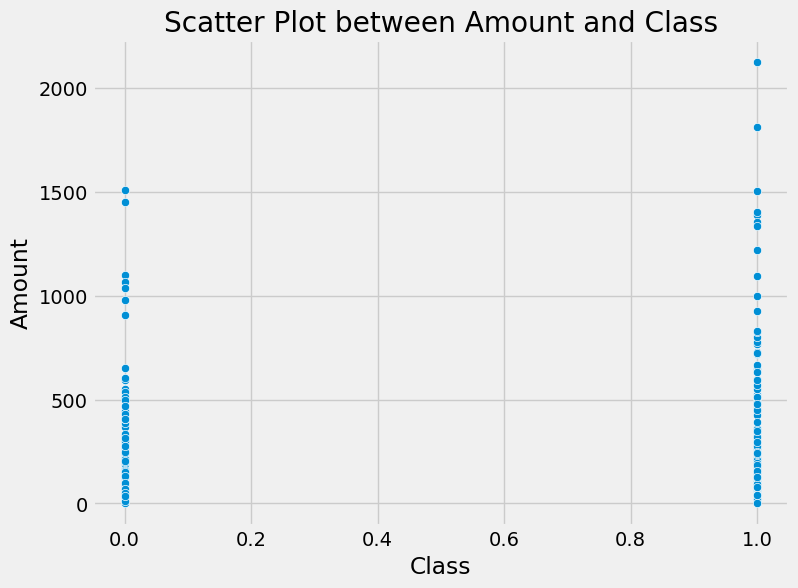

In [160]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_balanced_credit_card, y='Amount', x='Class')
plt.title('Scatter Plot between Amount and Class')
plt.show()

### Define X (independent variables)
We're going to use these variables to try to predict the Class of each purchase and future purchases.

In [47]:
X = np.asarray(df_balanced_credit_card[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']])
X[0:5]

array([[ 7.28280000e+04, -2.76904929e+00,  2.40617346e+00,
        -2.01663266e-01, -1.23110825e+00, -1.26162298e+00,
        -6.20012656e-01, -1.30474860e+00, -1.22798349e+00,
         7.05434137e-03, -5.81104306e-01, -4.24897556e-01,
         6.91066870e-01, -2.51470720e-01,  9.85552970e-01,
         5.11176032e-01,  4.32838435e-01,  4.41992123e-01,
        -8.50703097e-01, -1.24056620e+00, -9.38152638e-01,
         2.48500395e+00, -8.18264645e-01,  5.57655064e-01,
         3.80453327e-01, -2.63713110e-01,  7.37906588e-01,
        -7.64089071e-01, -7.93570499e-02,  7.70000000e-01],
       [ 1.28776000e+05,  4.85923948e-02,  9.14185641e-01,
         3.09506626e-01, -5.90078076e-01,  4.48091928e-01,
        -1.11488436e+00,  1.05260589e+00, -2.40222407e-01,
        -1.29822851e-01, -4.27392524e-01, -8.23377809e-01,
         4.37416466e-01,  5.67106851e-01,  1.35621681e-03,
        -4.65496363e-01, -1.22032472e-01, -4.37343128e-01,
        -8.20260176e-01, -9.09727627e-02, -5.68736579e-

###  Define y (dependent variable)
`y` is the dependent variable, the target of the prediction. In our case `Class`.

In [48]:
y = np.asarray(df_balanced_credit_card['Class'])
y[0:5]

array([0, 0, 0, 0, 0])

#### Normalize the dataset

In [50]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.30184982, -0.0723783 ,  0.16251136,  0.52320667, -1.10808073,
         0.07168222,  0.02805398,  0.26101297, -0.31381423,  0.56171269,
         0.49747986, -0.82682102,  0.81930324, -0.19390772,  0.97114402,
         0.56767685,  0.72151934,  0.62718127,  0.11423101, -1.21708721,
        -1.05324426,  0.74904621, -0.70841021,  0.49189077,  0.72038343,
        -0.44529048,  1.50292416, -0.85819317, -0.29164892, -0.4596652 ],
       [ 0.86718483,  0.43837509, -0.24197728,  0.60500733, -0.90695721,
         0.47779672, -0.24806662,  0.66578624, -0.11149998,  0.50272831,
         0.53136449, -0.96970492,  0.76426365,  0.59719318,  0.75877449,
        -0.41445444,  0.56175363,  0.48024817,  0.12683547, -0.32170245,
        -0.1733046 , -0.22358156, -0.45780384,  0.07280155,  0.15136569,
        -0.75430598,  0.23224811,  0.15553998,  0.13801714, -0.4508458 ],
       [ 0.92723712,  0.19680603, -0.74249256,  0.40312925, -1.35703335,
         0.97882406, -0.28877784,  0.59441398, -0

#### Define Train/Test dataset

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (787, 30) (787,)
Test set: (197, 30) (197,)


#### Modeling Logistic Regression

In [144]:
log_reg_lib = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
log_reg_nwt = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train, y_train)
log_reg_lb = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train, y_train)
log_reg_sag = LogisticRegression(C=0.01, solver='sag').fit(X_train, y_train)

#### Predictions

In [146]:
yhat_lib = log_reg_lib.predict(X_test)
yhat_nwt = log_reg_nwt.predict(X_test)
yhat_lb = log_reg_lb.predict(X_test)
yhat_sag = log_reg_sag.predict(X_test)

yhat_lib

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

#### Evaluation

#### - Jaccard Score

In [148]:
print ('Jaccard score \n ============')
print("liblinear: ", jaccard_score(y_test, yhat_lib, pos_label=0))
print("newton-cg: ", jaccard_score(y_test, yhat_nwt, pos_label=0))
print("lbfgs: ", jaccard_score(y_test, yhat_lb, pos_label=0))
print("sag: ", jaccard_score(y_test, yhat_sag,pos_label=0))

Jaccard score 
liblinear:  0.8532110091743119
newton-cg:  0.8691588785046729
lbfgs:  0.8691588785046729
sag:  0.8691588785046729


#### - Accuracy Score

In [149]:
print ("Accuracy score on testing data \n ============")
print ("libnear: ", accuracy_score(yhat_lib, y_test))
print ("newton-cg: ",accuracy_score(yhat_nwt, y_test))

Accuracy score on testing data 
libnear:  0.9187817258883249
newton-cg:  0.9289340101522843


#### - Confussion Matrix

In [150]:
# Solver: libnear
cnf_matrix = confusion_matrix(y_test, yhat_lib, labels=[1,0])
print (cnf_matrix)

[[88 16]
 [ 0 93]]


In [151]:
# Solver: newton-cg
cnf_matrix_nwt = confusion_matrix(y_test, yhat_nwt, labels=[1,0])
print(cnf_matrix_nwt)

[[90 14]
 [ 0 93]]


In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues) -> None:
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[78 21]
 [ 0 98]]


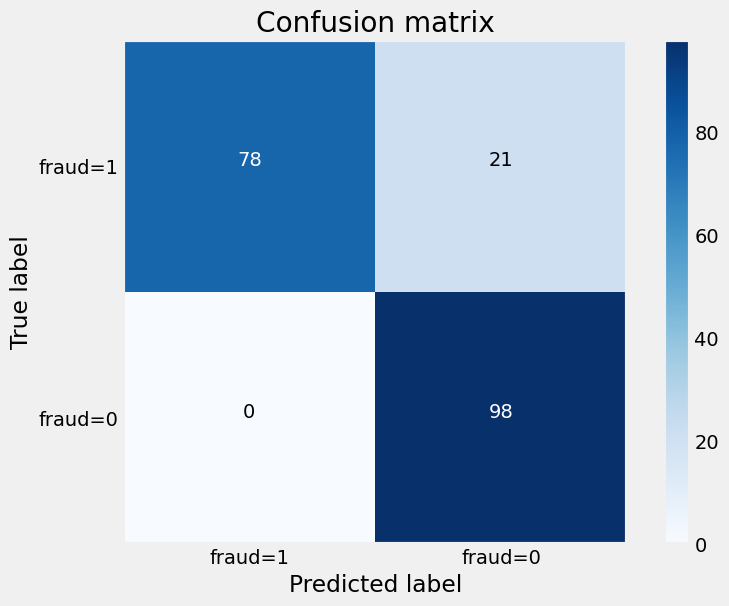

In [131]:
plt.figure(figsize=(8,6))
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=['fraud=1', 'fraud=0'], normalize=False)